In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 10, 12
import warnings
from sklearn.metrics import mean_squared_error
warnings.filterwarnings('ignore')
%matplotlib inline

In [141]:
df_India= pd.read_csv('covid_19_India.csv')
India_coord = pd.read_excel('Indian Coordinates.xlsx')


In [142]:
print(df_India.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 9 columns):
Sno                         2450 non-null int64
Date                        2450 non-null object
Time                        2450 non-null object
State/UnionTerritory        2450 non-null object
ConfirmedIndianNational     2450 non-null object
ConfirmedForeignNational    2450 non-null object
Cured                       2450 non-null int64
Deaths                      2450 non-null int64
Confirmed                   2450 non-null int64
dtypes: int64(4), object(5)
memory usage: 172.4+ KB
None


In [143]:
df_India.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [144]:
df_India.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2445,2446,29/05/20,8:00 AM,Tripura,-,-,165,0,230
2446,2447,29/05/20,8:00 AM,Uttarakhand,-,-,79,4,469
2447,2448,29/05/20,8:00 AM,Uttar Pradesh,-,-,3991,182,6991
2448,2449,29/05/20,8:00 AM,West Bengal,-,-,1578,289,4192
2449,2450,29/05/20,8:00 AM,Cases being reassigned to states,-,-,0,0,4332


In [145]:
df_India.dtypes

Sno                          int64
Date                        object
Time                        object
State/UnionTerritory        object
ConfirmedIndianNational     object
ConfirmedForeignNational    object
Cured                        int64
Deaths                       int64
Confirmed                    int64
dtype: object

In [146]:
print(India_coord.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 3 columns):
Name of State / UT    35 non-null object
Latitude              35 non-null float64
Longitude             35 non-null float64
dtypes: float64(2), object(1)
memory usage: 968.0+ bytes
None


In [147]:
India_coord.head()

,Name of State / UT,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973


In [148]:
def replace_dash_with_zeros(inp):
    return int(inp.replace("-","0"))

df_India.drop(['Sno'],axis=1,inplace=True)
df_India['Date'] = pd.to_datetime(df_India['Date'], format = "%d/%m/%y")
# https://www.stat.berkeley.edu/~s133/dates.html
df_India['ConfirmedIndianNational'] = df_India['ConfirmedIndianNational'].apply(replace_dash_with_zeros)
df_India['ConfirmedForeignNational'] = df_India['ConfirmedForeignNational'].apply(replace_dash_with_zeros)
df_India.sort_values("Confirmed", ascending = False, inplace = True)
df_India

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
2397,2020-05-28,8:00 AM,Maharashtra,0,0,17918,1897,56948
2433,2020-05-29,8:00 AM,Maharashtra,0,0,17918,1897,56948
2361,2020-05-27,8:00 AM,Maharashtra,0,0,16954,1792,54758
2325,2020-05-26,8:00 AM,Maharashtra,0,0,15786,1695,52667
2290,2020-05-25,8:00 AM,Maharashtra,0,0,14600,1635,50231
...,...,...,...,...,...,...,...,...
1047,2020-04-17,5:00 PM,Nagaland,0,0,0,0,0
1179,2020-04-21,5:00 PM,Nagaland,0,0,0,0,0
981,2020-04-15,5:00 PM,Nagaland,0,0,0,0,0
1113,2020-04-19,5:00 PM,Nagaland,0,0,0,0,0


In [149]:
df_India.loc[df_India["ConfirmedForeignNational"] == "-",:]

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed


In [150]:
list(zip(df_India.columns,df_India.dtypes,df_India.isna().sum()))

[('Date', dtype('<M8[ns]'), 0),
 ('Time', dtype('O'), 0),
 ('State/UnionTerritory', dtype('O'), 0),
 ('ConfirmedIndianNational', dtype('int64'), 0),
 ('ConfirmedForeignNational', dtype('int64'), 0),
 ('Cured', dtype('int64'), 0),
 ('Deaths', dtype('int64'), 0),
 ('Confirmed', dtype('int64'), 0)]

In [151]:
print(f'We have data available from : {df_India.Date.min()} to {df_India.Date.max()}')

We have data available from : 2020-01-30 00:00:00 to 2020-05-29 00:00:00


In [152]:
df_India.groupby(["State/UnionTerritory", "Date"]).sum()

ConfirmedIndianNational  \
State/UnionTerritory        Date                                  
Andaman and Nicobar Islands 2020-03-26                        1   
                            2020-03-27                        1   
                            2020-03-28                        6   
                            2020-03-29                        0   
                            2020-03-30                        0   
...                                                         ...   
West Bengal                 2020-05-25                        0   
                            2020-05-26                        0   
                            2020-05-27                        0   
                            2020-05-28                        0   
                            2020-05-29                        0   

                                        ConfirmedForeignNational  Cured  \
State/UnionTerritory        Date                                          
Andaman and Nicobar Islands 2020-03-26                         0      0   
                            2020-03-27                         0      0   
                            2020-03-28                         0      0   
                            2020-03-29                         0      0   
                            2020-03-30                         0      0   
...                                                          ...    ...   
West Bengal                 2020-05-25                         0   1339   
                            2020-05-26                         0   1414   
                            2020-05-27                         0   1486   
                            2020-05-28                         0   1578   
                            2020-05-29                         0   1578   

                                        Deaths  Confirmed  
State/UnionTerritory        Date                           
Andaman and Nicobar Islands 2020-03-26       0          1  
                            2020-03-27       0          1  
                            2020-03-28       0          6  
                            2020-03-29       0          9  
                            2020-03-30       0          9  
...                                        ...        ...  
West Bengal                 2020-05-25     272       3667  
                            2020-05-26     278       3816  
                            2020-05-27     283       4009  
                            2020-05-28     289       4192  
                            2020-05-29     289       4192  

[2450 rows x 5 columns]

In [153]:
States = df_India['State/UnionTerritory'].unique().tolist()
States

['Maharashtra',
 'Tamil Nadu',
 'Delhi',
 'Gujarat',
 'Rajasthan',
 'Madhya Pradesh',
 'Uttar Pradesh',
 'Cases being reassigned to states',
 'West Bengal',
 'Andhra Pradesh',
 'Bihar',
 'Karnataka',
 'Punjab',
 'Telengana',
 'Jammu and Kashmir',
 'Odisha',
 'Haryana',
 'Kerala',
 'Assam',
 'Uttarakhand',
 'Jharkhand',
 'Chhattisgarh',
 'Chandigarh',
 'Himachal Pradesh',
 'Tripura',
 'Unassigned',
 'Goa',
 'Ladakh',
 'Puducherry',
 'Manipur',
 'Andaman and Nicobar Islands',
 'Meghalaya',
 'Nagaland',
 'Arunachal Pradesh',
 'Dadar Nagar Haveli',
 'Sikkim',
 'Mizoram']

In [154]:
States.remove("Cases being reassigned to states")
States.remove("Unassigned")
States

['Maharashtra',
 'Tamil Nadu',
 'Delhi',
 'Gujarat',
 'Rajasthan',
 'Madhya Pradesh',
 'Uttar Pradesh',
 'West Bengal',
 'Andhra Pradesh',
 'Bihar',
 'Karnataka',
 'Punjab',
 'Telengana',
 'Jammu and Kashmir',
 'Odisha',
 'Haryana',
 'Kerala',
 'Assam',
 'Uttarakhand',
 'Jharkhand',
 'Chhattisgarh',
 'Chandigarh',
 'Himachal Pradesh',
 'Tripura',
 'Goa',
 'Ladakh',
 'Puducherry',
 'Manipur',
 'Andaman and Nicobar Islands',
 'Meghalaya',
 'Nagaland',
 'Arunachal Pradesh',
 'Dadar Nagar Haveli',
 'Sikkim',
 'Mizoram']

In [155]:
len(States)

35

## Merging Data Frames

In [156]:
df_final_India = pd.DataFrame()
dates = pd.DataFrame({"Date": pd.date_range(df_India.Date.min(),df_India.Date.max())})
for state in States:
    all_dates_df = pd.merge(dates, 
                            df_India.loc[df_India['State/UnionTerritory'] == state,:], on = "Date",
                           how = "left")
    all_dates_df['State/UnionTerritory'] = state
    all_dates_df = all_dates_df.fillna(0)
    all_dates_df['New Cases'] = all_dates_df['Confirmed'] - all_dates_df['Confirmed'].shift(1)
#     print(state)
#     display(all_dates_df.loc[all_dates_df['New Cases'] <  0,:])
    df_final_India = pd.concat([df_final_India, all_dates_df],axis = 0)
print("Finally we have a data of Size: ",df_final_India.shape)
df_final_India.head()

Finally we have a data of Size:  (4235, 9)


,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,New Cases
0,2020-01-30,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,NaN
1,2020-01-31,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-02-01,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-02-02,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-02-03,0,Maharashtra,0.0,0.0,0.0,0.0,0.0,0.0


In [157]:
df_final_India.dropna(inplace = True)
df_final_India.shape


(4200, 9)

In [158]:
del df_final_India['Time']
del df_final_India['ConfirmedIndianNational']
del df_final_India['ConfirmedForeignNational']

In [159]:
df_final_India

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,New Cases
1,2020-01-31,Maharashtra,0.0,0.0,0.0,0.0
2,2020-02-01,Maharashtra,0.0,0.0,0.0,0.0
3,2020-02-02,Maharashtra,0.0,0.0,0.0,0.0
4,2020-02-03,Maharashtra,0.0,0.0,0.0,0.0
5,2020-02-04,Maharashtra,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
116,2020-05-25,Mizoram,1.0,0.0,1.0,0.0
117,2020-05-26,Mizoram,1.0,0.0,1.0,0.0
118,2020-05-27,Mizoram,1.0,0.0,1.0,0.0
119,2020-05-28,Mizoram,1.0,0.0,1.0,0.0


In [160]:
df_final_India.groupby(["State/UnionTerritory", "Date"]).sum()

Cured  Deaths  Confirmed  New Cases
State/UnionTerritory        Date                                            
Andaman and Nicobar Islands 2020-01-31     0.0     0.0        0.0        0.0
                            2020-02-01     0.0     0.0        0.0        0.0
                            2020-02-02     0.0     0.0        0.0        0.0
                            2020-02-03     0.0     0.0        0.0        0.0
                            2020-02-04     0.0     0.0        0.0        0.0
...                                        ...     ...        ...        ...
West Bengal                 2020-05-25  1339.0   272.0     3667.0      208.0
                            2020-05-26  1414.0   278.0     3816.0      149.0
                            2020-05-27  1486.0   283.0     4009.0      193.0
                            2020-05-28  1578.0   289.0     4192.0      183.0
                            2020-05-29  1578.0   289.0     4192.0        0.0

[4200 rows x 4 columns]

In [161]:
df_final_India = df_final_India.groupby(["State/UnionTerritory", "Date"]).sum().reset_index()
df_final_India

,State/UnionTerritory,Date,Cured,Deaths,Confirmed,New Cases
0,Andaman and Nicobar Islands,2020-01-31,0.0,0.0,0.0,0.0
1,Andaman and Nicobar Islands,2020-02-01,0.0,0.0,0.0,0.0
2,Andaman and Nicobar Islands,2020-02-02,0.0,0.0,0.0,0.0
3,Andaman and Nicobar Islands,2020-02-03,0.0,0.0,0.0,0.0
4,Andaman and Nicobar Islands,2020-02-04,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
4195,West Bengal,2020-05-25,1339.0,272.0,3667.0,208.0
4196,West Bengal,2020-05-26,1414.0,278.0,3816.0,149.0
4197,West Bengal,2020-05-27,1486.0,283.0,4009.0,193.0
4198,West Bengal,2020-05-28,1578.0,289.0,4192.0,183.0


# Statewise Covid19 Status in India

In [162]:
# here we write the function for the pie plot
# we will call this function for every state and plot the pie chart for every state
# we will plot the total active cases , total recovered cases  and total deaths for each state within the given dates 
def plot_pie(active,cured,death,title):
    labels = ['Active','Recovered','Died']
    sizes = [active,cured,death]
    color= ['#66b3ff','green','red']
    explode = []

    for i in labels:
        explode.append(0.05)
    
    plt.figure(figsize= (15,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
    centre_circle = plt.Circle((0,0),0.70,fc='white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title +  'COVID-19 Cases',fontsize = 20)
    plt.axis('equal')   
    plt.tight_layout()
# we will call this function from the next cell for every state .

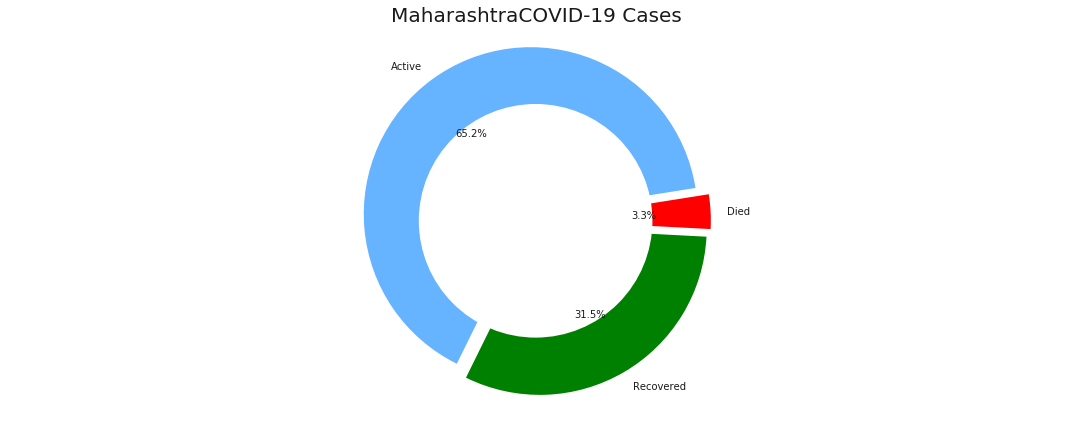

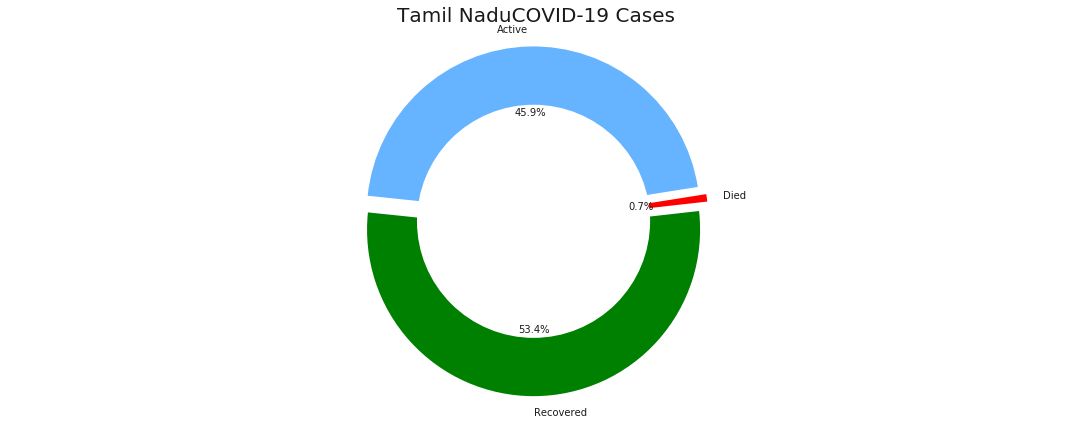

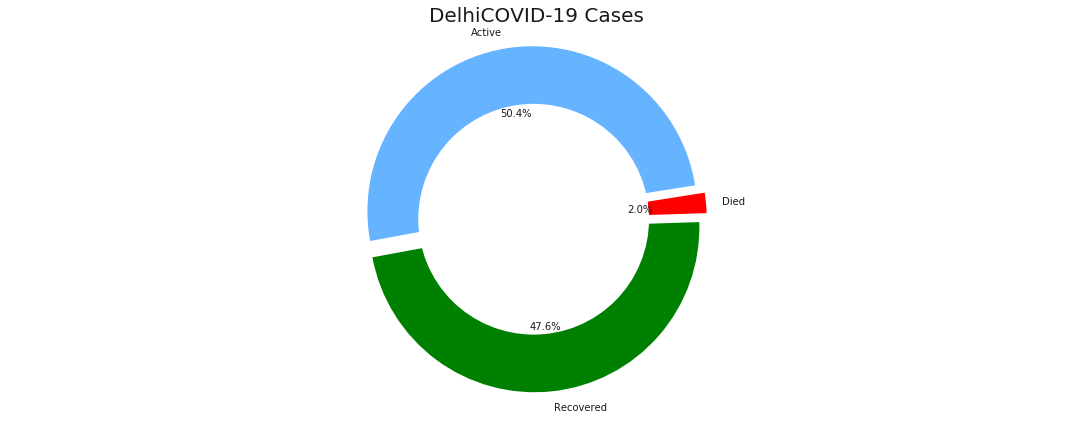

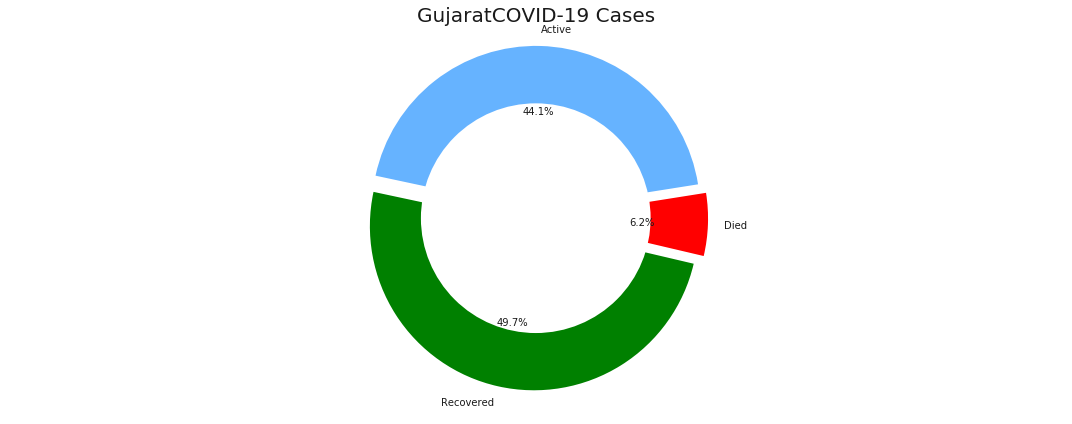

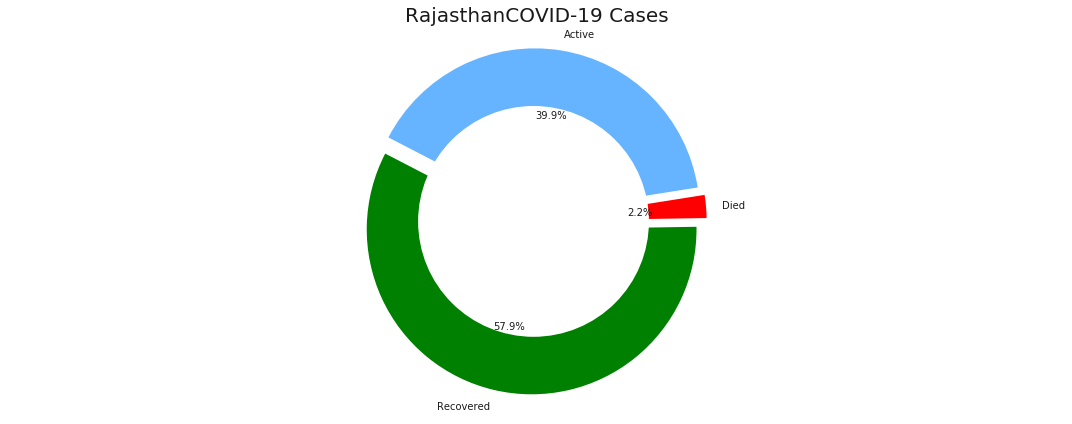

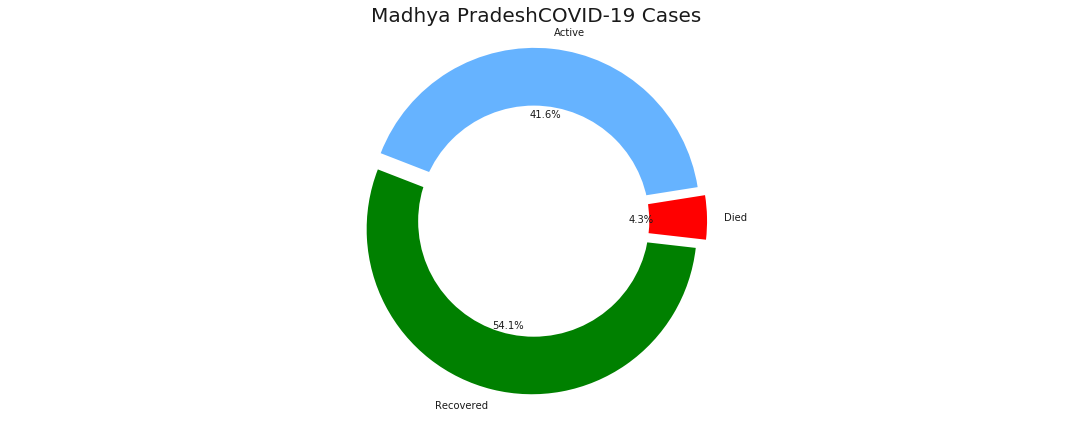

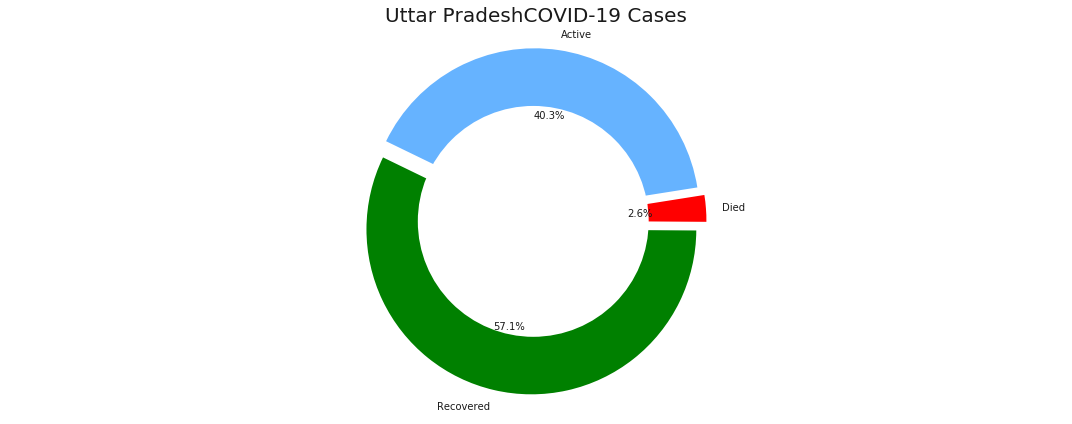

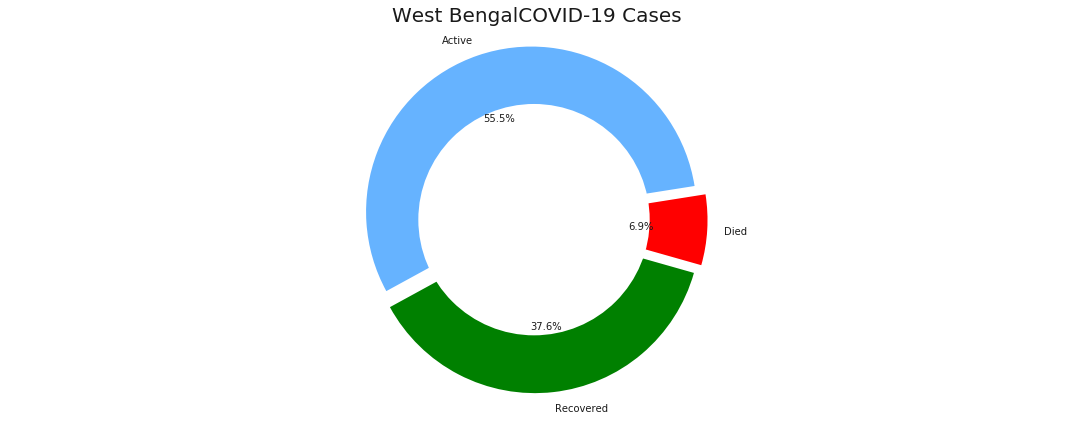

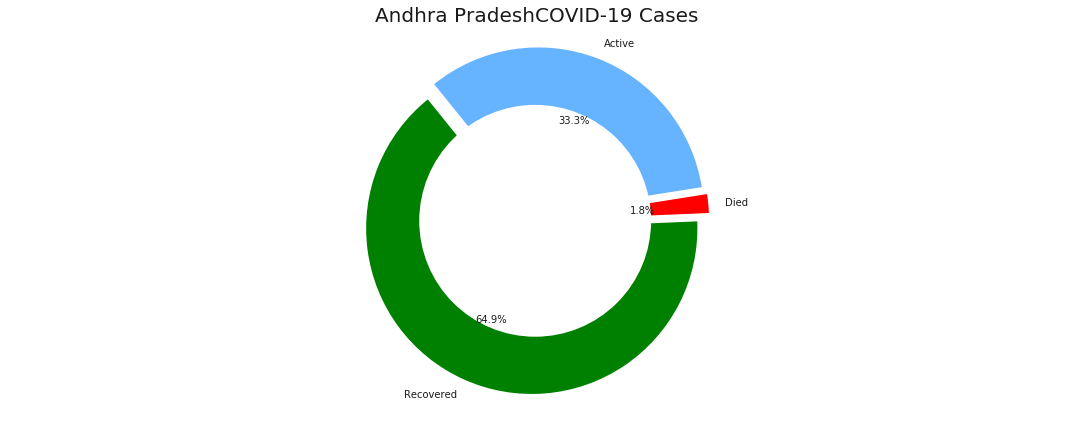

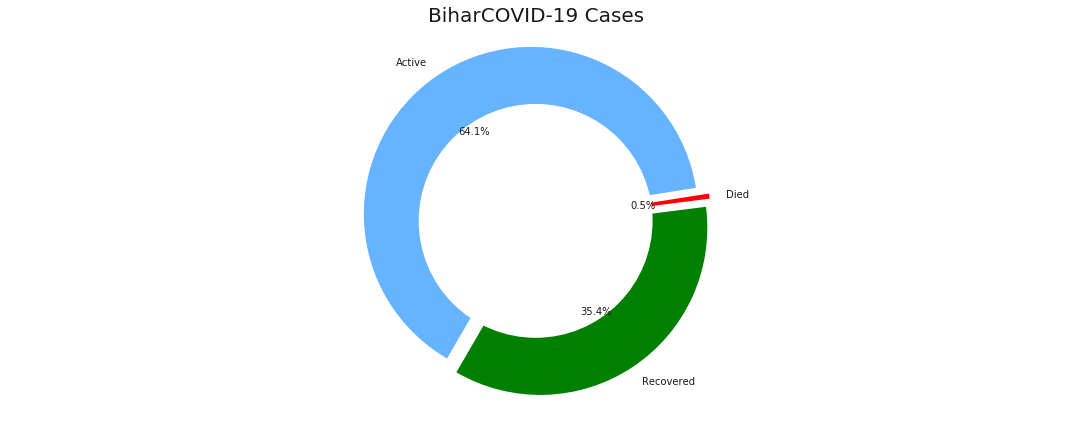

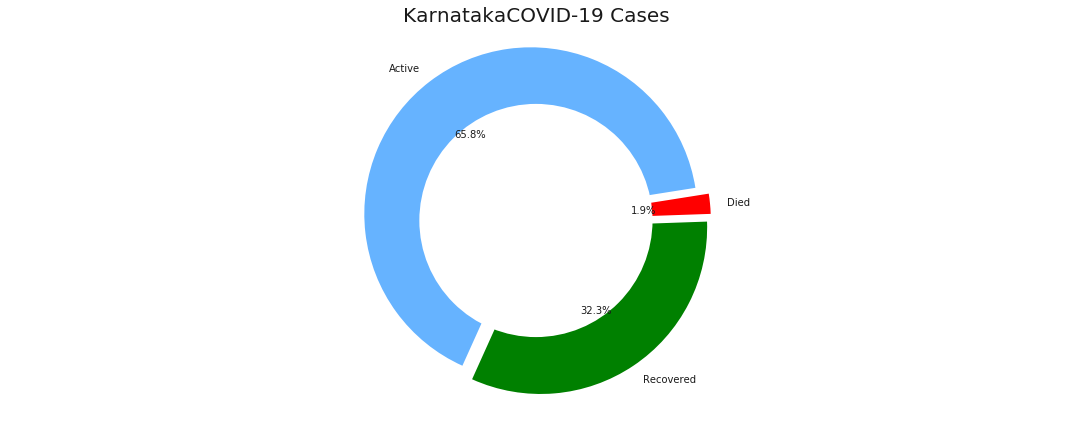

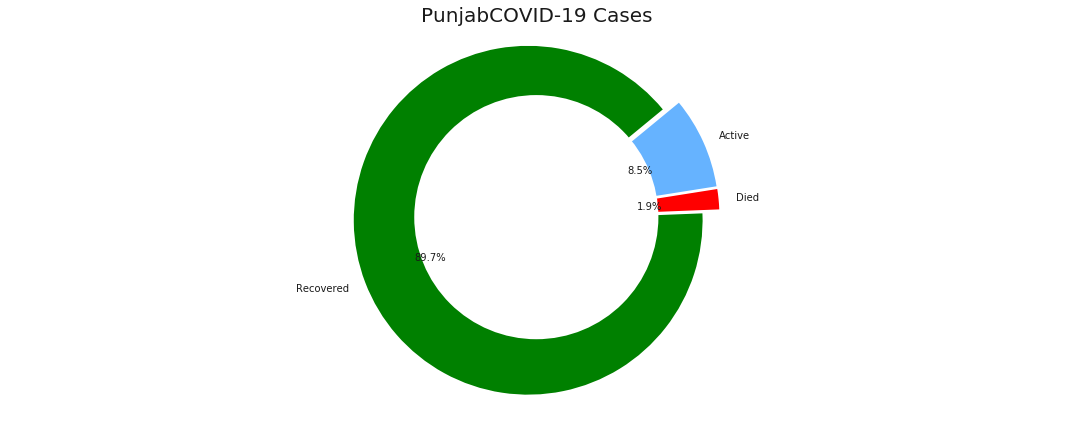

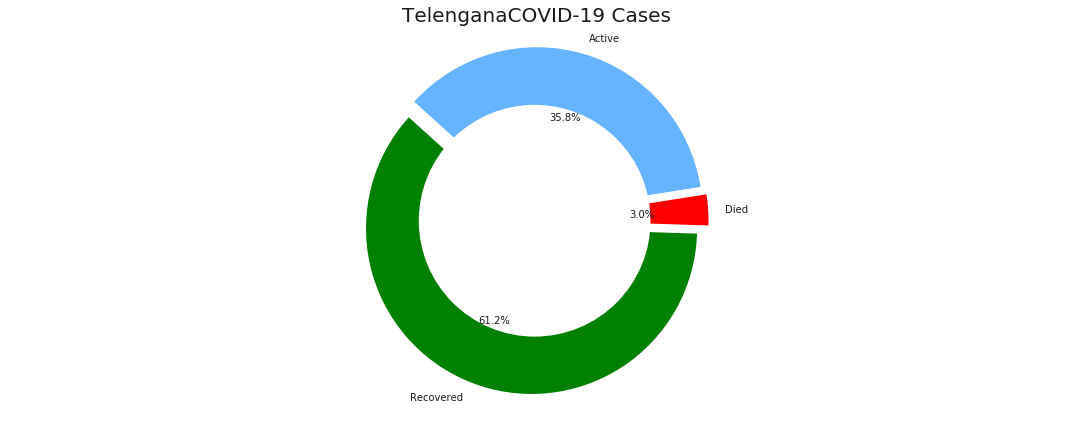

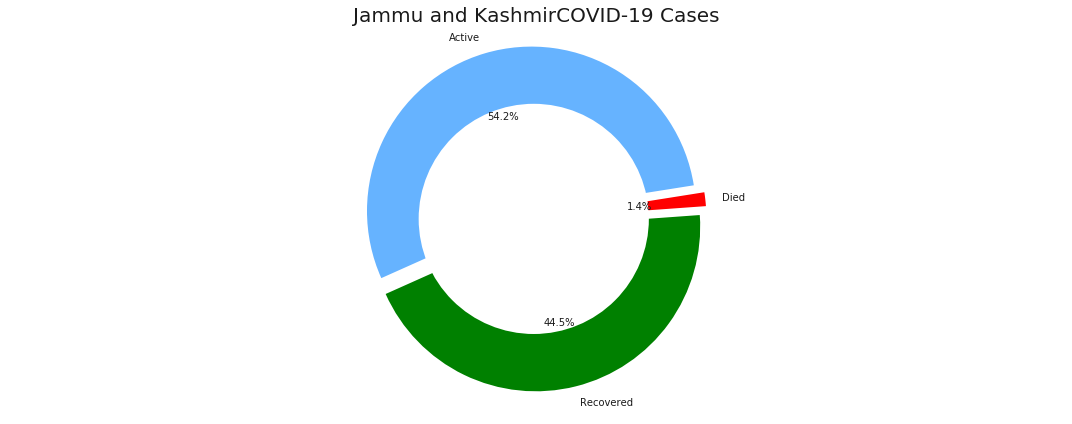

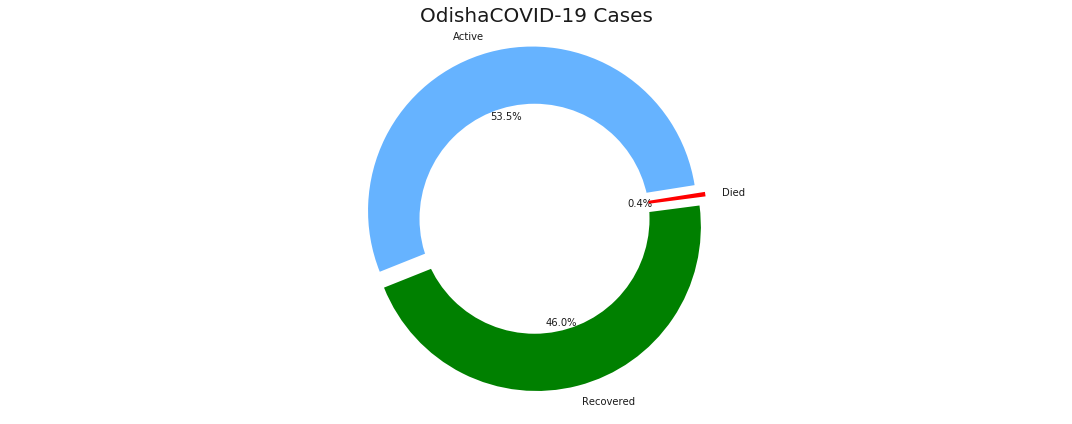

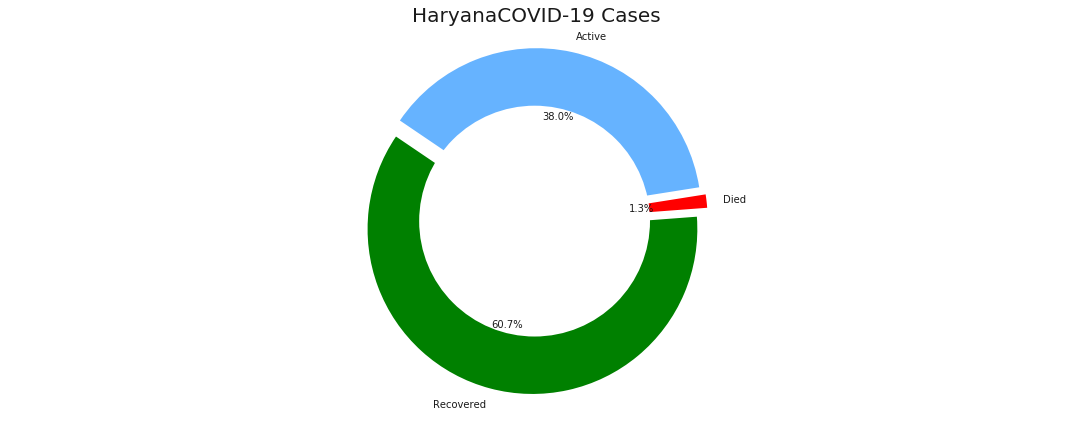

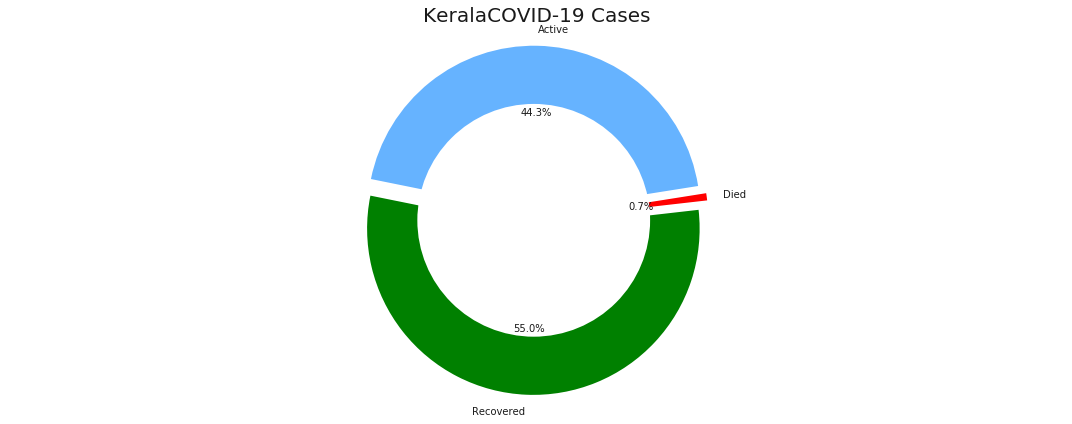

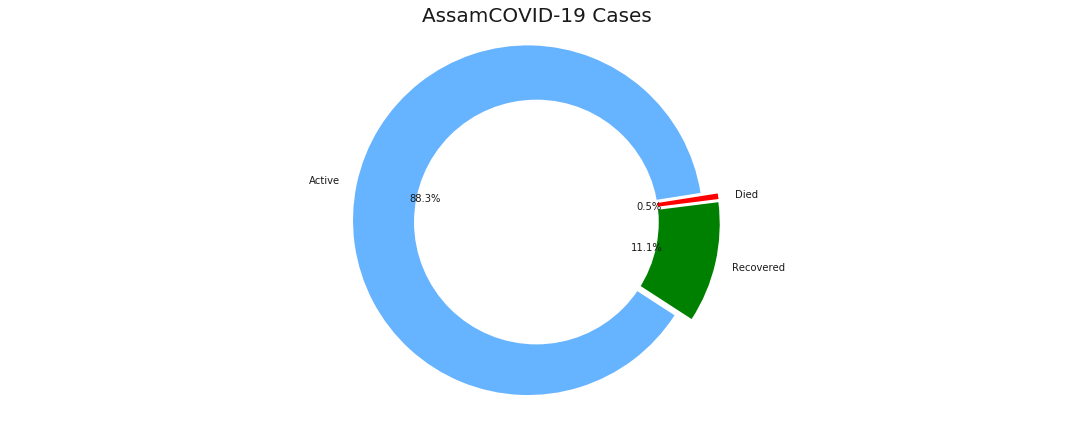

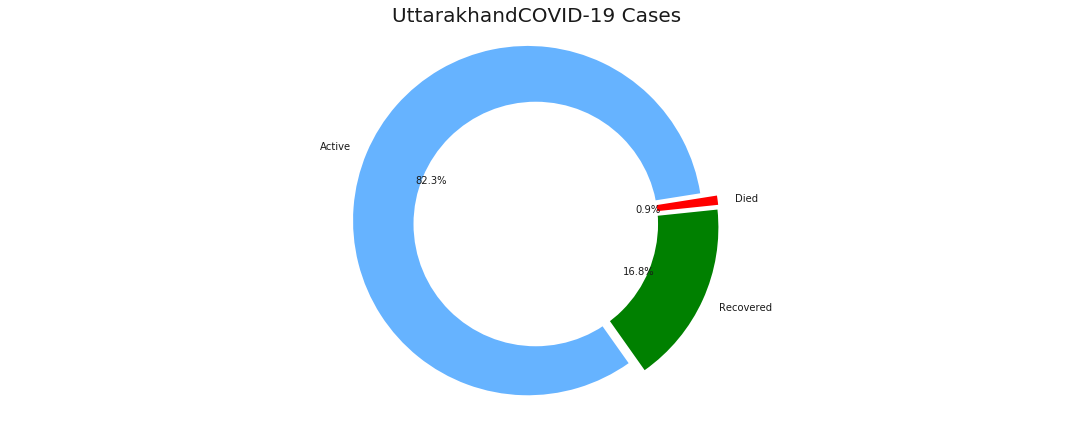

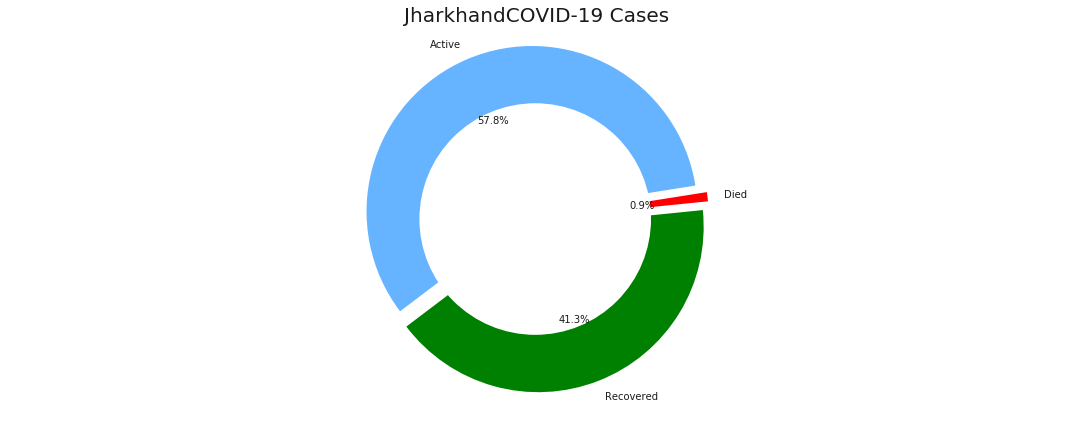

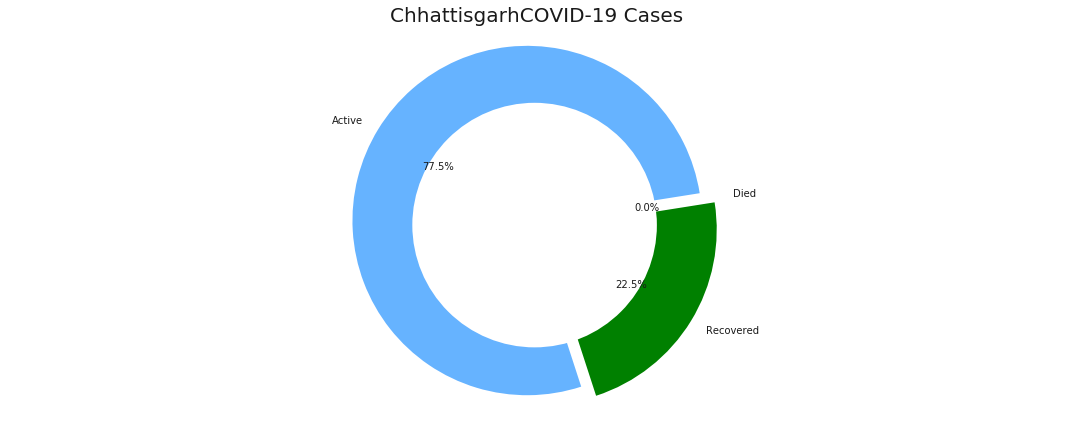

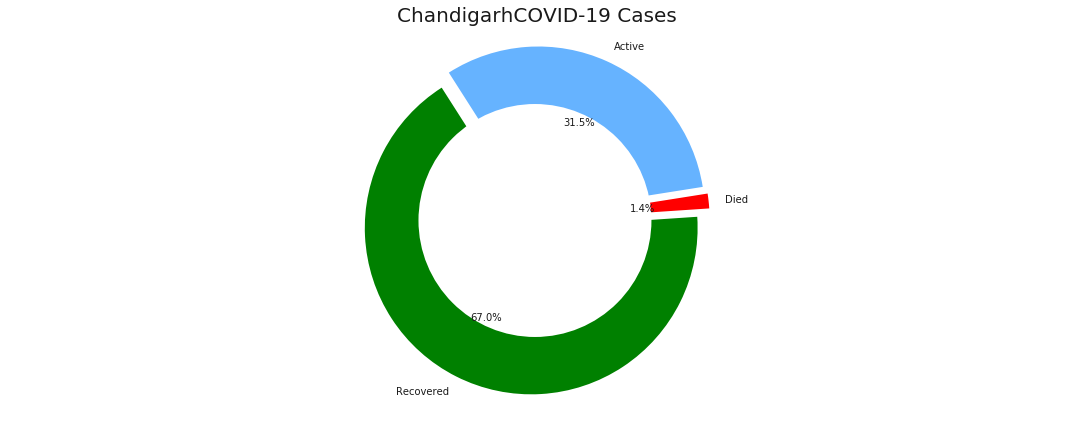

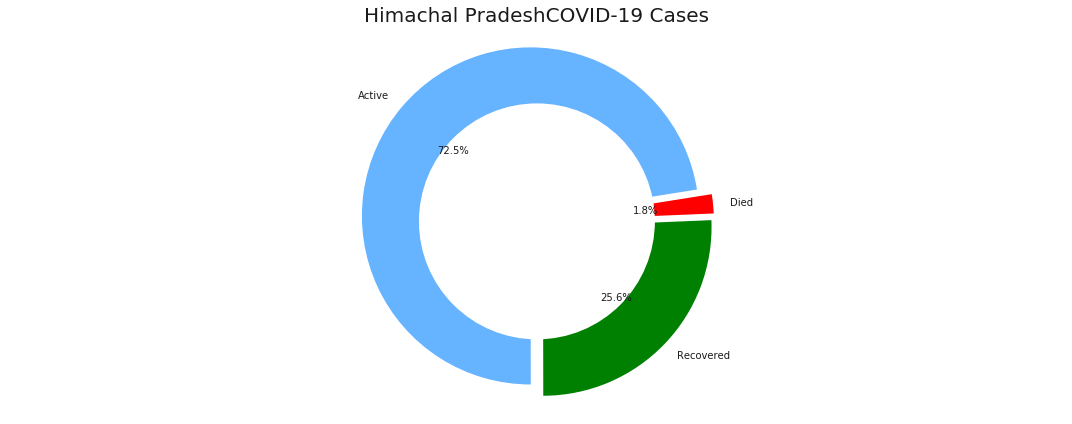

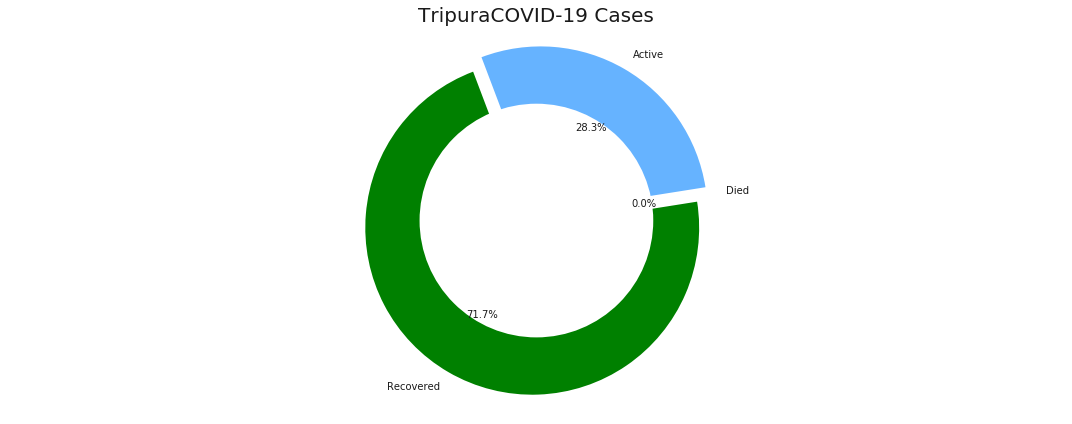

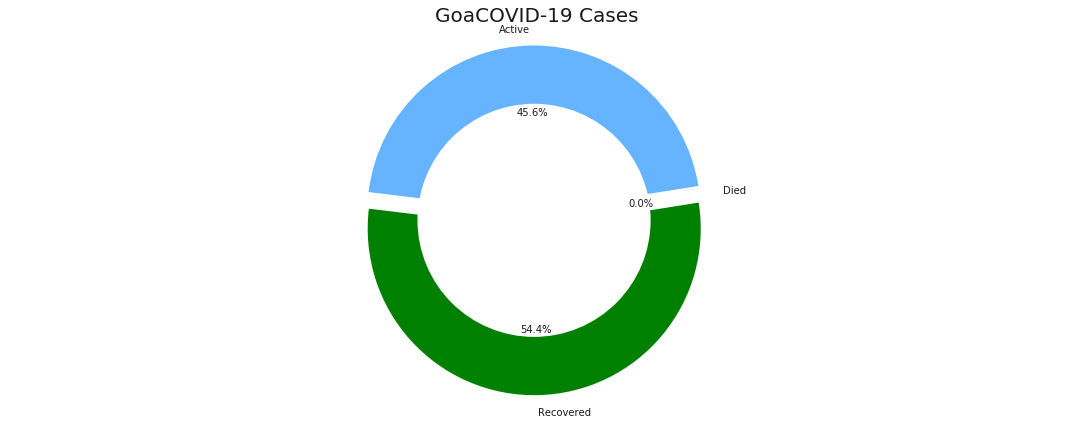

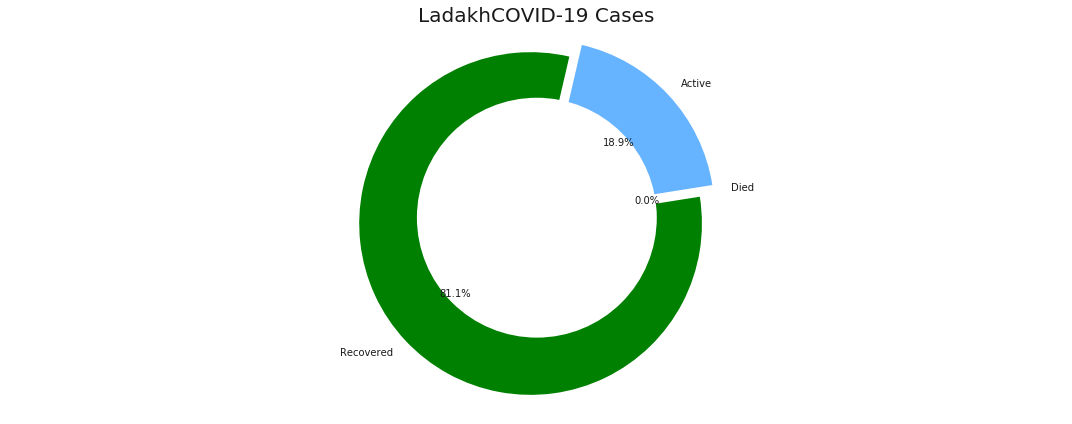

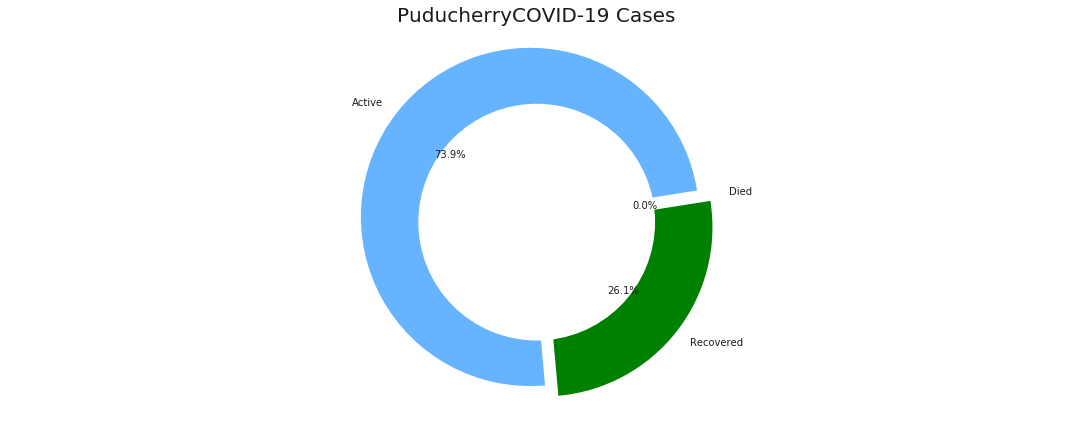

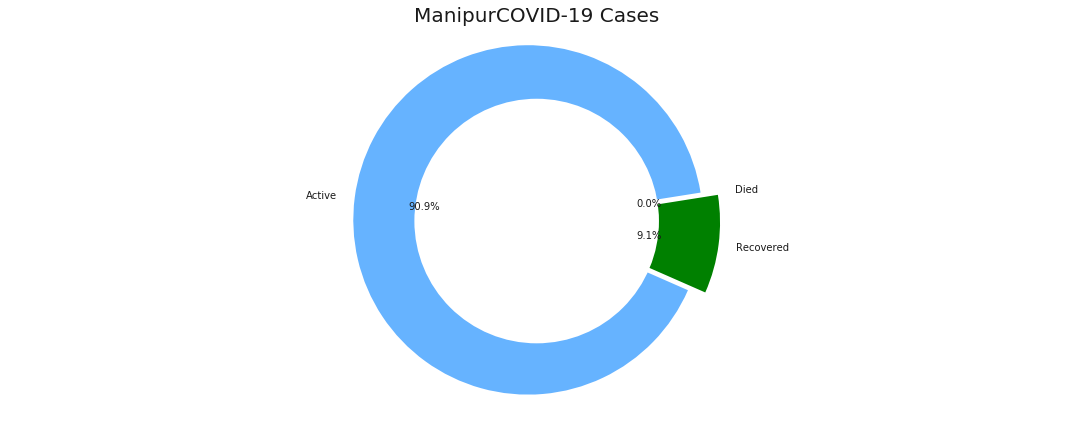

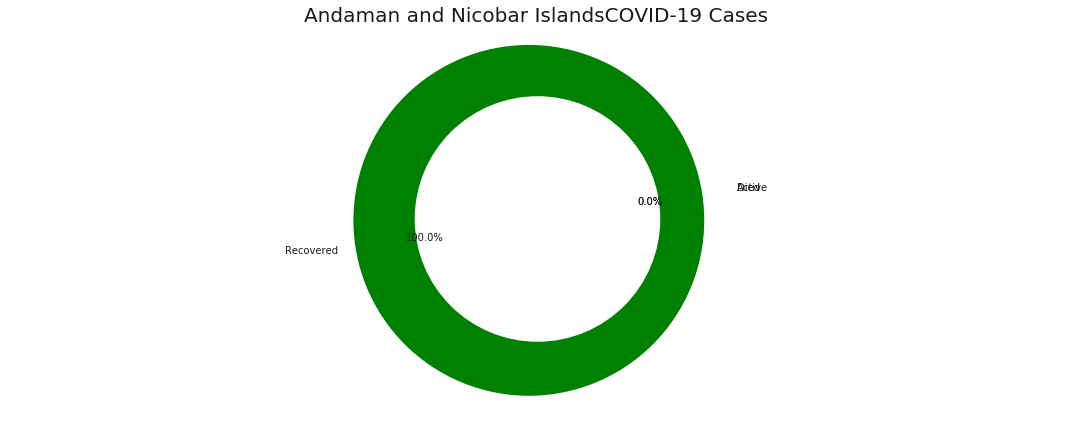

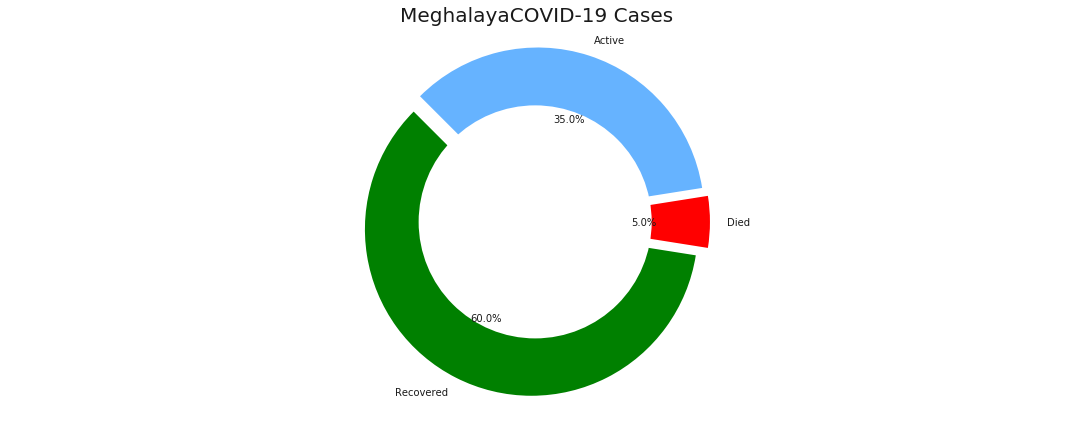

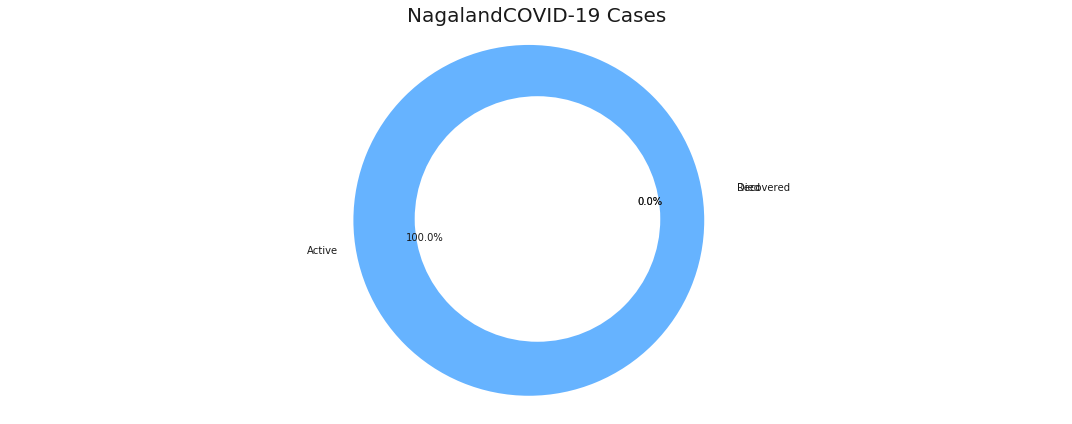

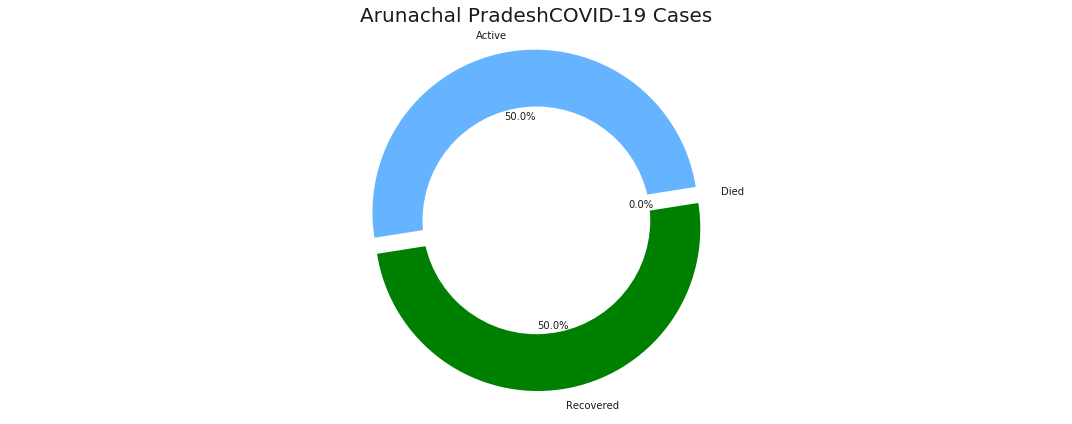

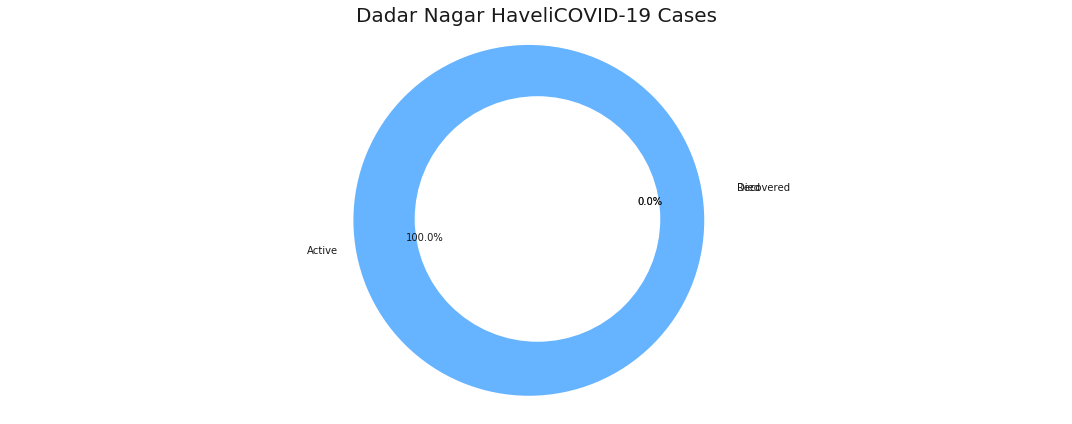

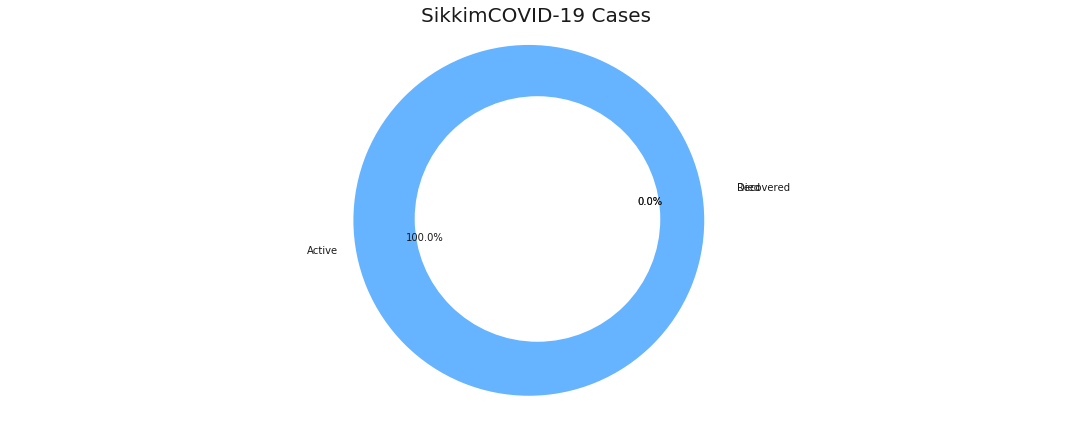

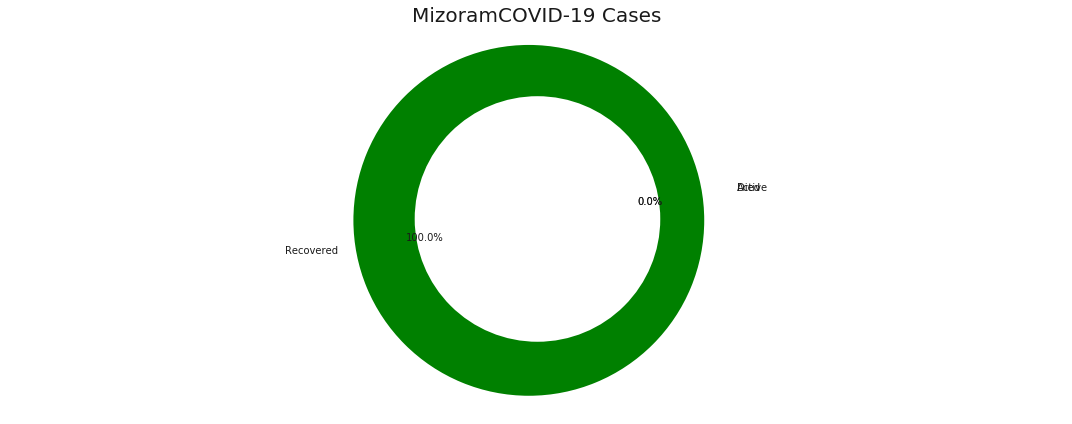

In [163]:
total_cases_india = 0
cured_cases_india = 0
death_cases_india = 0
active_cases_india = 0
state_df = pd.DataFrame()
# to plot the pie chart for each state 
# we need to call each state using for loop and visualize the data for each state 

for state in States:
    one_state_df = df_final_India.loc[df_final_India['State/UnionTerritory'] == state,:]
    
    state_df = pd.concat([state_df,pd.DataFrame(one_state_df.iloc[-1,:]).T],axis = 0)
    
    total_cases = one_state_df['Confirmed'].values[-1]
    cured = one_state_df['Cured'].values[-1]
    deaths = one_state_df['Deaths'].values[-1]
    active = total_cases - cured - deaths
    plot_pie(active, cured, deaths,state) # here we are calling the above plot_pie function 
    total_cases_india += total_cases
    cured_cases_india += cured
    death_cases_india += deaths
    active_cases_india += active

# Observations
-> We can cleary observe the percentage of active cases, recovered cases and death cases for every state in India .

-> In Maharastra there are 65.2% cases that are active and 31.5% cases recovered from the illness and 3.3% cases died due to the    corona virus

-> Like wise we can see the data for every state.

In [164]:
state_df.reset_index(inplace = True,drop = True)
state_df

,State/UnionTerritory,Date,Cured,Deaths,Confirmed,New Cases
0,Maharashtra,2020-05-29,17918,1897,56948,0
1,Tamil Nadu,2020-05-29,9909,133,18545,0
2,Delhi,2020-05-29,7264,303,15257,0
3,Gujarat,2020-05-29,7549,938,15195,0
4,Rajasthan,2020-05-29,4457,173,7703,0
5,Madhya Pradesh,2020-05-29,3927,313,7261,0
6,Uttar Pradesh,2020-05-29,3991,182,6991,0
7,West Bengal,2020-05-29,1578,289,4192,0
8,Andhra Pradesh,2020-05-29,2057,58,3171,0
9,Bihar,2020-05-29,1083,15,3061,0


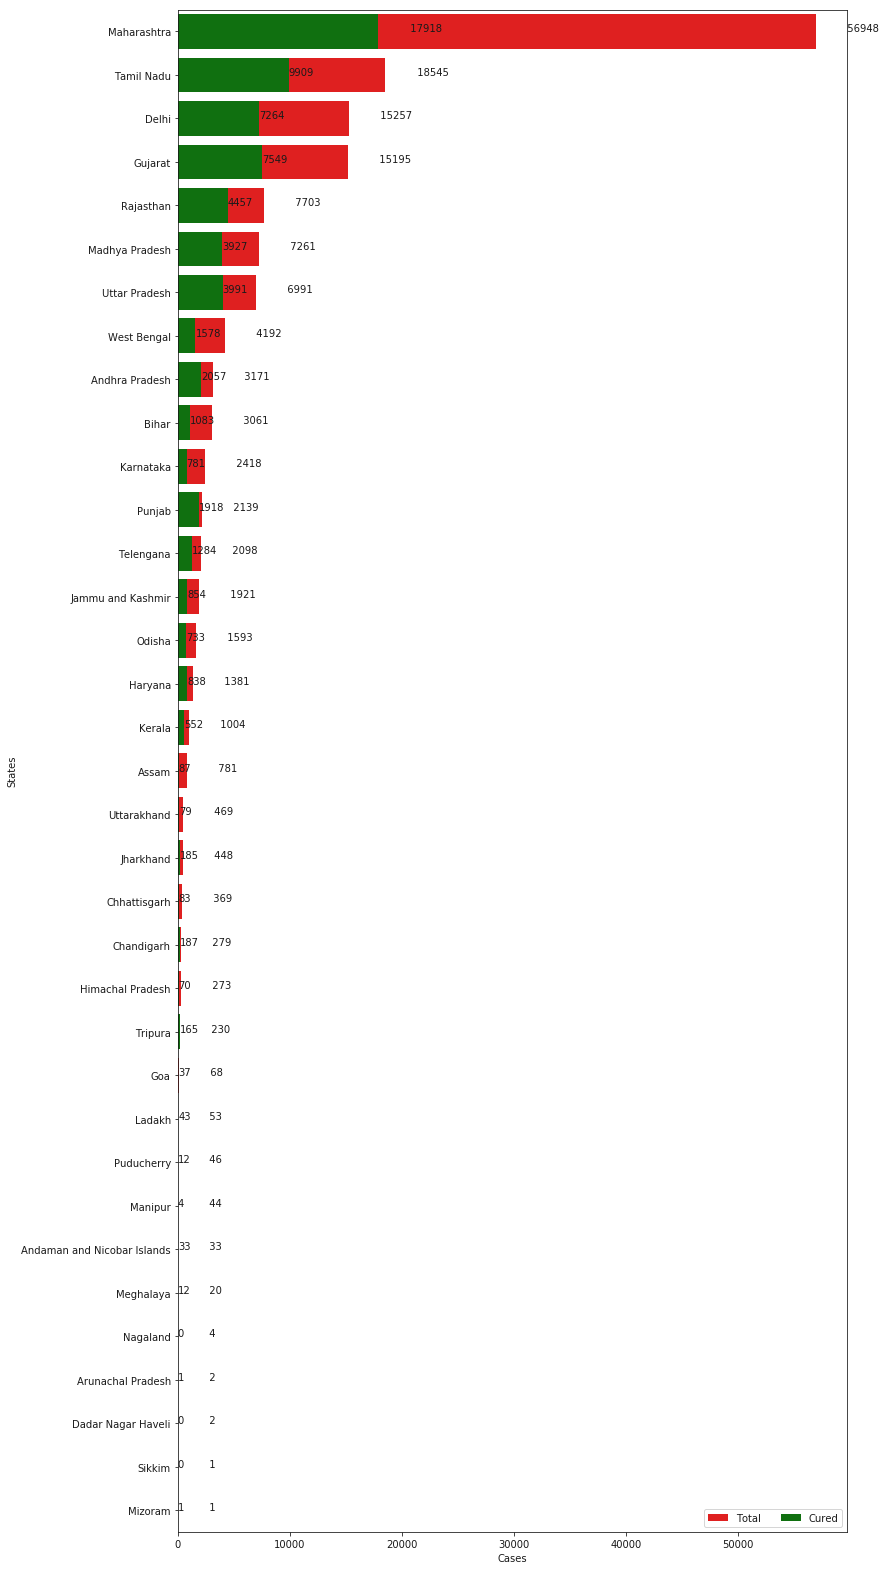

In [165]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]

data.sort_values('Confirmed',ascending=False,inplace=True) #we arrange the data in ascending order of the Confirmed cases.
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data, label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="States",xlabel="Cases")
i = 0

for p in ax.patches:
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(" "*10 + str(int(p.get_width())), (x, y))
    else:
        ax.annotate(int(p.get_width()), (x, y))
        
    i += 1


# Observations
-> We can observe the total number of confirmed cases for each state in red and from those confirmed cases 
   we can observe the recovered cases in the green colour 
   
-> Also we can clearly observe that the Maharastra, Tamilnadu , Delhi, Gujarat, Rajasthan are the most effected states

-> Mizoram, Sikkim ,Arunachal Pradesh and Nagaland are the least effected states due to Covid-19

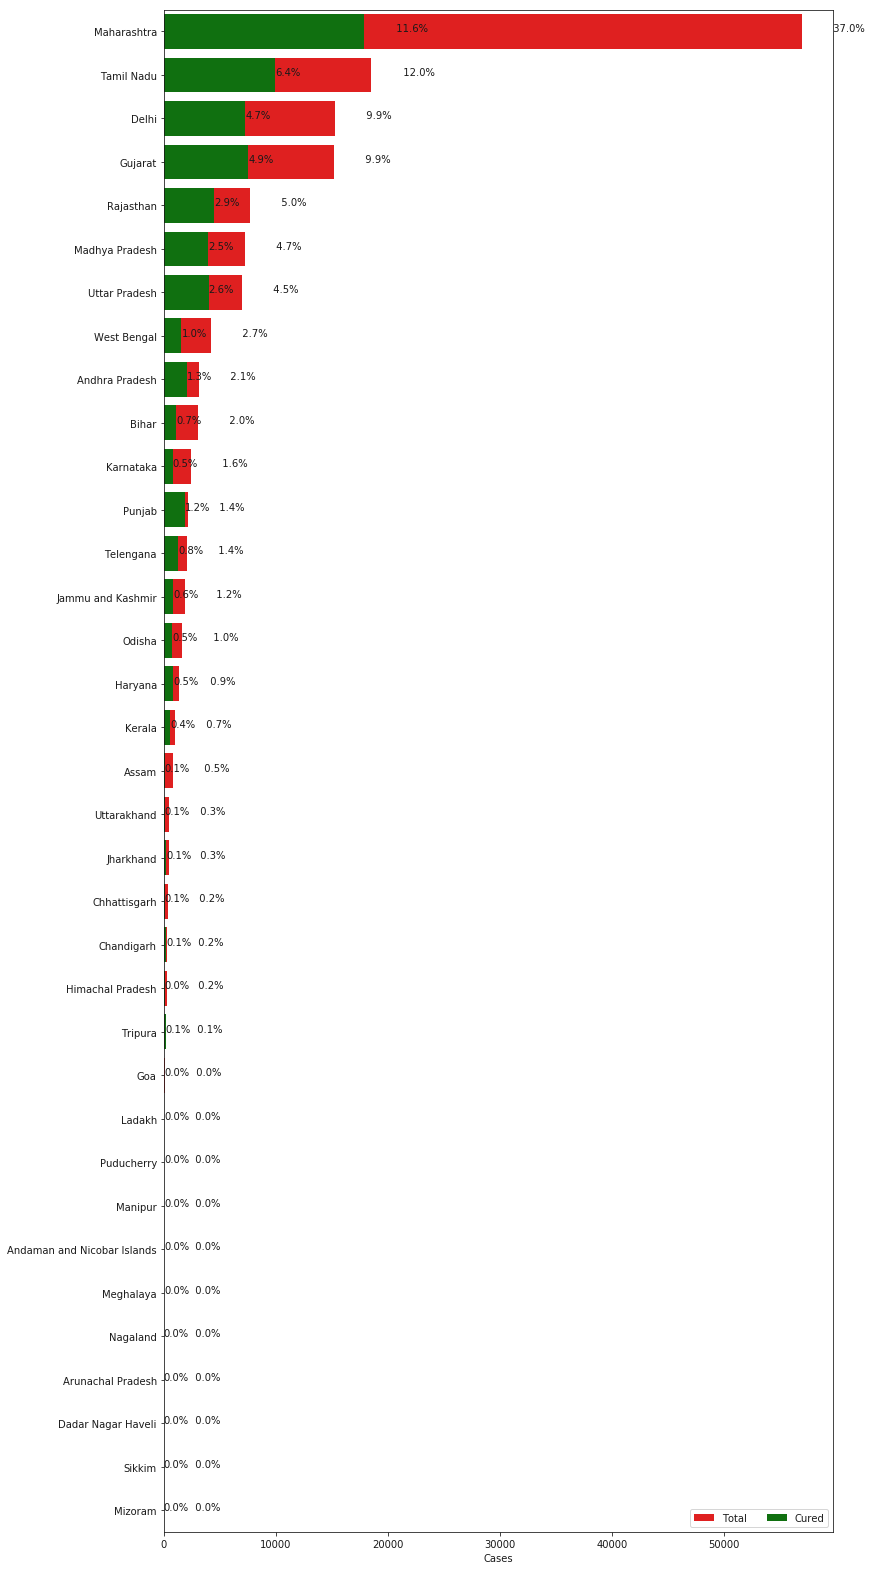

In [166]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['State/UnionTerritory','Confirmed','Cured','Deaths']]
data.sort_values('Confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="Confirmed", y="State/UnionTerritory", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="Cured", y="State/UnionTerritory", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")
total = total_cases_india
i = 0
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(States):
        ax.annotate(" "*10 + str(percentage), (x, y))
    else:
        ax.annotate(percentage, (x, y))
        
    i += 1

# Observations

-> From the graph we can see that Maharastra alone has 37% of cases of the whole country.

-> TamilNadu has 12% cases of the whole country.

-> Delhi and Gujrat constitute for 19.8 % of cases with each having 9.9% cases .

-> From the Graph we can observe that only some of the states in India are effected by COVID-19 and those states are drastically    suffering and contributing for the nation's increase in number of cases .
   


# Overall Covid19 Status in India

Total infected cases in India:  154001.0
Total cured cases in India:  67692.0
Total active cases in India:  81778.0
Total death cases in India:  4531.0


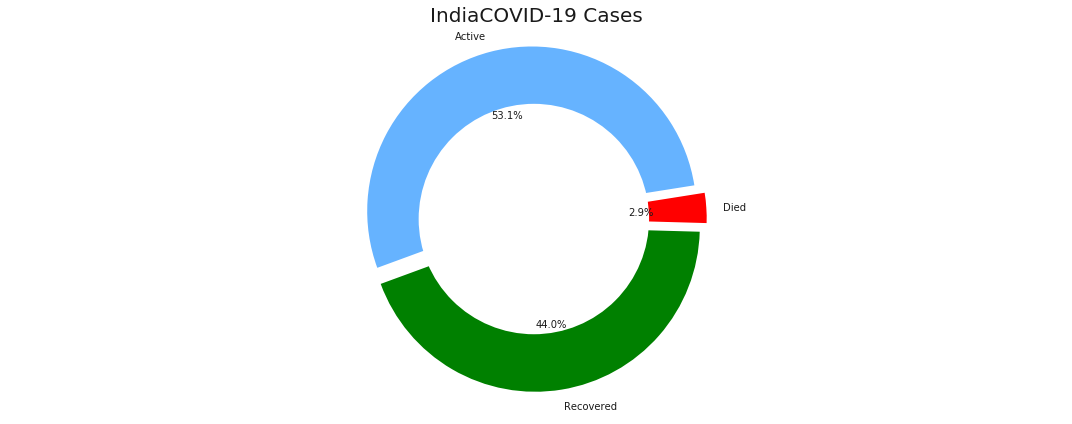

In [167]:
print("Total infected cases in India: ", total_cases_india)
print("Total cured cases in India: ", cured_cases_india)
print("Total active cases in India: ", active_cases_india)
print("Total death cases in India: ", death_cases_india)
plot_pie(active_cases_india, cured_cases_india, death_cases_india, "India")

# Observations 
-> The total number of cases in India are 154001

-> 44% of the cases are cured 

-> 53% of the cases still active  

-> 2.9% i.e., 4531 people died due to corona .



# VISUALISING THE SPREADS GEOGRAPHICALLY

In [168]:
India_coord.rename(columns = {"Name of State / UT" : "State/UnionTerritory"}, inplace = True)

In [169]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar ',
 'Andaman and Nicobar Islands',
 'Arunachal Pradesh',
 'Arunachal Pradesh ',
 'Assam',
 'Assam ',
 'Bihar',
 'Bihar ',
 'Chandigarh',
 'Chandigarh ',
 'Chhattisgarh',
 'Chhattisgarh ',
 'Dadar Nagar Haveli',
 'Dadra And Nagar Haveli ',
 'Goa',
 'Goa ',
 'Gujarat',
 'Himachal Pradesh',
 'Himachal Pradesh ',
 'Jammu and Kashmir',
 'Jharkhand',
 'Jharkhand ',
 'Ladakh',
 'Lakshadweep ',
 'Madhya Pradesh',
 'Madhya Pradesh ',
 'Manipur',
 'Manipur ',
 'Meghalaya',
 'Meghalaya ',
 'Mizoram',
 'Mizoram ',
 'Nagaland',
 'Nagaland ',
 'Odisha',
 'Orissa ',
 'Puducherry',
 'Puducherry ',
 'Sikkim',
 'Sikkim ',
 'Tripura',
 'Tripura ',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh',
 'West Bengal',
 'West Bengal '}

In [170]:
India_coord['State/UnionTerritory'] = India_coord['State/UnionTerritory'].str.strip()
state_df['State/UnionTerritory'] = state_df['State/UnionTerritory'].str.strip()

In [171]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar',
 'Andaman and Nicobar Islands',
 'Dadar Nagar Haveli',
 'Dadra And Nagar Haveli',
 'Gujarat',
 'Jammu and Kashmir',
 'Ladakh',
 'Lakshadweep',
 'Odisha',
 'Orissa',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh'}

In [172]:
India_coord.loc[India_coord.shape[0]] = ['Gujarat','22.2587','71.1924']
India_coord

,State/UnionTerritory,Latitude,Longitude
0,Andaman And Nicobar,11.667,92.736
1,Andhra Pradesh,14.7504,78.57
2,Arunachal Pradesh,27.1004,93.6166
3,Assam,26.75,94.2167
4,Bihar,25.7854,87.48
5,Chandigarh,30.72,76.78
6,Chhattisgarh,22.0904,82.16
7,Dadra And Nagar Haveli,20.2666,73.0166
8,Delhi,28.67,77.23
9,Goa,15.492,73.818


In [173]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Andaman And Nicobar',
 'Andaman and Nicobar Islands',
 'Dadar Nagar Haveli',
 'Dadra And Nagar Haveli',
 'Jammu and Kashmir',
 'Ladakh',
 'Lakshadweep',
 'Odisha',
 'Orissa',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh'}

In [174]:
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Andaman And Nicobar", 
                                        "Andaman and Nicobar Islands",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Union Territory of Jammu and Kashmir", 
                                        "Jammu and Kashmir",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Union Territory of Ladakh", 
                                        "Ladakh",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Orissa", 
                                        "Odisha",India_coord['State/UnionTerritory'])
India_coord['State/UnionTerritory'] = np.where(India_coord['State/UnionTerritory'] == "Dadra And Nagar Haveli", 
                                        "Dadar Nagar Haveli",India_coord['State/UnionTerritory'])

In [175]:
set(India_coord['State/UnionTerritory'].values).symmetric_difference(set(state_df['State/UnionTerritory'].values))

{'Lakshadweep'}

In [176]:
df_full = pd.merge(India_coord,state_df,on='State/UnionTerritory').reset_index(drop = True)
df_full

,State/UnionTerritory,Latitude,Longitude,Date,Cured,Deaths,Confirmed,New Cases
0,Andaman and Nicobar Islands,11.667,92.736,2020-05-29,33,0,33,0
1,Andhra Pradesh,14.7504,78.57,2020-05-29,2057,58,3171,0
2,Arunachal Pradesh,27.1004,93.6166,2020-05-29,1,0,2,0
3,Assam,26.75,94.2167,2020-05-29,87,4,781,0
4,Bihar,25.7854,87.48,2020-05-29,1083,15,3061,0
5,Chandigarh,30.72,76.78,2020-05-29,187,4,279,0
6,Chhattisgarh,22.0904,82.16,2020-05-29,83,0,369,0
7,Dadar Nagar Haveli,20.2666,73.0166,2020-05-29,0,0,2,0
8,Delhi,28.67,77.23,2020-05-29,7264,303,15257,0
9,Goa,15.492,73.818,2020-05-29,37,0,68,0


In [177]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenterrain')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'],
                                 df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, 
                        popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),
                        color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

# Observations 
-> From the map we can notice that there are more cases from Maharastra

-> TamilNadu and Delhi are next 

-> with this map  we visualize the data graphically with the help of latitudes and longitudes

-> This is a Terrain Map

In [178]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='OpenStreetMap')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], 
                                 df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, 
                        popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',
                        fill_color='red',fill_opacity=0.3 ).add_to(map)
map

# Observations 
-> From the map we can notice that there are more cases from Maharastra 

-> TamilNadu and Delhi are next 

-> with this map  we visualize the data graphically with the help of latitudes and longitudes

-> This is a OpenStreet Map

In [179]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='Stamenwatercolor')

for lat, lon, value, name in zip(df_full['Latitude'], df_full['Longitude'], df_full['Confirmed'], df_full['State/UnionTerritory']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() + '<br>''<strong>Total Cases</strong>: ' + str(value) + '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

# Observations 
-> From the map we can notice that there are more cases from the West of the country

-> There are considerble amount of cases from the South and North of the country

-> The East of the country has less cases 

-> This is a Watercolor  Map

# Lets check the trend of the virus

In [180]:
df_daywise_India = df_final_India.groupby("Date")['Confirmed','Cured','Deaths',"New Cases"].sum().reset_index()
df_daywise_India

,Date,Confirmed,Cured,Deaths,New Cases
0,2020-01-31,1.0,0.0,0.0,0.0
1,2020-02-01,2.0,0.0,0.0,1.0
2,2020-02-02,3.0,0.0,0.0,1.0
3,2020-02-03,3.0,0.0,0.0,0.0
4,2020-02-04,3.0,0.0,0.0,0.0
...,...,...,...,...,...
115,2020-05-25,136203.0,57721.0,4021.0,6673.0
116,2020-05-26,142410.0,60491.0,4167.0,6207.0
117,2020-05-27,147754.0,64426.0,4337.0,5344.0
118,2020-05-28,154001.0,67692.0,4531.0,6247.0


In [181]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_daywise_India['Date'], y = df_daywise_India['Confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# Observations

-> we can observe that the cases were constant from 2nd of Febuary  to 29th of March   

-> Then the number of cases incresed rapidly upto 30th of May 

-> Between 2nd April and 3rd May the cases doubled from 20,000 to 40,000

-> This is a cumulative chart.

In [182]:
fig = px.bar(df_daywise_India, x="Date", y="New Cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# Observations

-> This shows the number of cases observed on daily basis.

-> The cases incresed  exponentially . 

-> Most cases were observed on May 25 (6673 cases) .

-> Least were observed before March 15 .

In [183]:
fig = px.bar(df_daywise_India, x="Date", y="Deaths", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Deaths in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# Observations 
-> The number of deaths double in 12 days (from 1000 to 2000) 

-> Highest number of deaths were recorded on May 28 (4531)

-> The deaths incresed rapidly 


In [184]:
fig = px.bar(df_daywise_India, x="Date", y="Confirmed", color='Confirmed', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

'''Colour Scale for plotly
https://plot.ly/python/builtin-colorscales/
'''

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

# Observations

-> The number of Covid-19 cases increased rapidly in an exponential manner  . 

-> It took 11 days to reach from 20000 to 40000

-> It took 12 days to reach from 40000 to 80000



In [185]:
fig = px.line(df_daywise_India, x='Date', y='New Cases', labels = {'x': "Dates",'y': "Counts"})
fig.update_layout( showlegend=False,title_text="Trend of Coronavirus cases")
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()


# Observations

-> There was a sudden rise in cases on April 14 from 905 to 1463 .


-> On May 25 the number of cases recorded was highest .



In [186]:
fig = px.line(df_daywise_India, x='Date', y='Deaths', labels = {'x': "Dates",'y': "Counts"})
fig.update_layout( showlegend=False,title_text="Trend of Coronavirus Deaths ")
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()


# Observations 

-> There is a exponential rise in number of death due to Covid-19 

-> The number of deaths doubled in 10 days (from 1000 to 2000)